# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane were the most effective treatments.
- Treatments with Ramicane saw smaller tumor volumes on average. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results, mouse_metadata, how= "left", on= "Mouse ID")

# Display the data table for preview
study_data_complete.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [2]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse_ids[0]

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = study_data_complete.loc[study_data_complete["Mouse ID"] == duplicate_mouse_ids[0]]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete = study_data_complete[study_data_complete["Mouse ID"].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_data_complete["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
df2 = clean_study_data_complete.groupby("Drug Regimen").agg(
    {"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}


)
df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [8]:
counts = clean_study_data_complete["Drug Regimen"].value_counts()
counts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

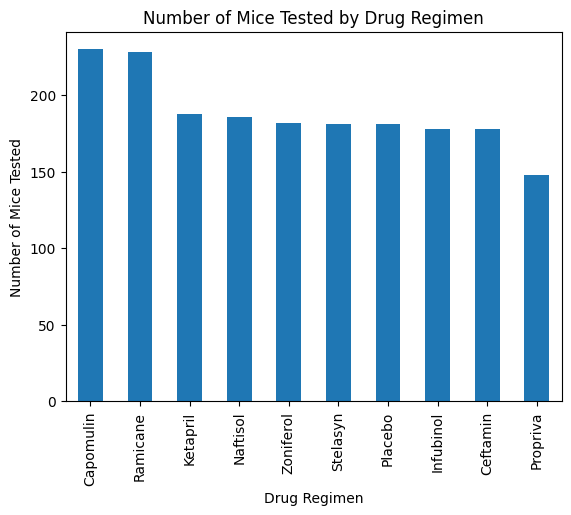

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested by Drug Regimen")
plt.xticks(rotation=90)
plt.show()

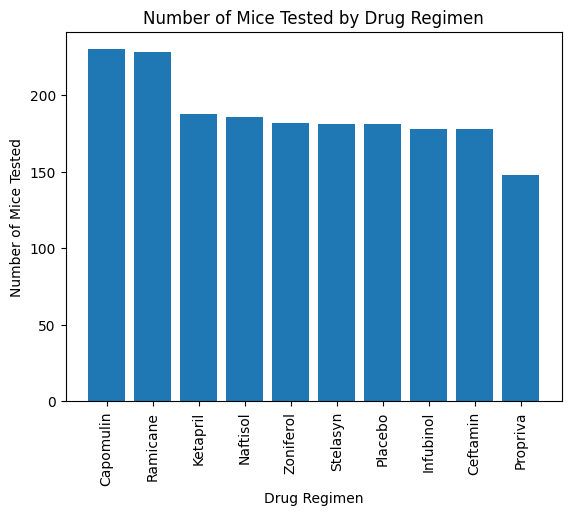

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(counts.index.values,
        counts.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested by Drug Regimen")
plt.xticks(rotation=90)
plt.show()

In [11]:
gender_counts = clean_study_data_complete["Sex"].value_counts()
gender_counts

Sex
Male      958
Female    922
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

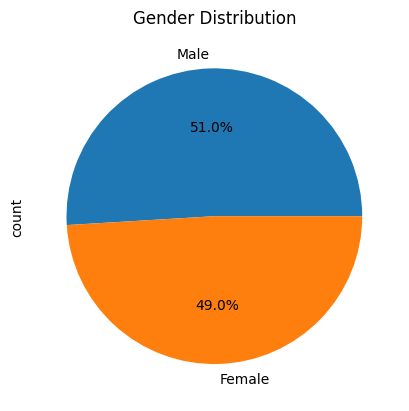

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts.plot(
    kind = "pie",
    autopct= "%1.1f%%"
)

plt.title("Gender Distribution")
plt.show

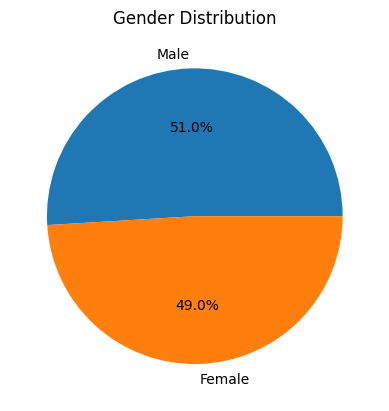

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(
    gender_counts.values,
    labels = gender_counts.index.values,
    autopct = "%1.1f%%"

)

plt.title("Gender Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxTimepoint = clean_study_data_complete.groupby("Mouse ID")["Timepoint"].max()
maxTimepoint = maxTimepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = maxTimepoint.merge(clean_study_data_complete, on=["Mouse ID", "Timepoint"], how = "left")
final_tumor_volume.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    treatment_data = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

    q1 = np.percentile(treatment_data, 25)
    q3 = np.percentile(treatment_data, 75)

    iqr = q3 - q1

    tumor_volume.append({
        "Treatment": treatment,
        "Q1": q1,
        "Q3": q3,
        "IQR": iqr
    })

for volume_data in tumor_volume:
    print(f"Treatment: {volume_data['Treatment']}")
    print(f"  Q1: {volume_data['Q1']:.2f}")
    print(f"  Q3: {volume_data['Q3']:.2f}")
    print(f"  IQR: {volume_data['IQR']:.2f}")
    print()

    
# Locate the rows which contain mice on each drug and get the tumor volumes

treatment_volumes = {}


for treatment in treatments:
    
    treatment_data = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    
    treatment_volumes[treatment] = treatment_data.tolist()


for treatment, volumes in treatment_volumes.items():
    print(f"Treatment: {treatment}")
    print(f"Tumor Volumes: {volumes}")
    print()


Treatment: Capomulin
  Q1: 32.38
  Q3: 40.16
  IQR: 7.78

Treatment: Ramicane
  Q1: 31.56
  Q3: 40.66
  IQR: 9.10

Treatment: Infubinol
  Q1: 54.05
  Q3: 65.53
  IQR: 11.48

Treatment: Ceftamin
  Q1: 48.72
  Q3: 64.30
  IQR: 15.58

Treatment: Capomulin
Tumor Volumes: [38.98287774, 38.93963263, 30.48598484, 37.07402422, 40.1592203, 47.68596303, 37.31184577, 38.1251644, 38.75326548, 41.48300765, 38.84687569, 28.43096411, 33.32909778, 46.53920617, 32.37735684, 41.58152074, 23.34359787, 40.72857787, 34.45529799, 31.02392294, 40.65812366, 39.95234669, 36.04104736, 28.48403281, 31.8962384]

Treatment: Ramicane
Tumor Volumes: [38.4076183, 43.0475426, 38.81036633, 32.97852192, 38.34200823, 33.39765251, 37.31123552, 40.65900627, 29.12847181, 33.56240217, 36.37451039, 31.56046955, 36.13485243, 22.05012627, 30.56462509, 31.09533505, 45.22086888, 36.56165229, 37.22565033, 43.41938077, 30.27623175, 40.66771292, 43.16637266, 44.18345092, 30.63869575]

Treatment: Infubinol
Tumor Volumes: [67.97341878

In [16]:
final_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [17]:
# Empty dictionary to store tumor volumes for each treatment
treatment_volumes = {}

# Loop through each treatment
for treatment in treatments:
    # Filter rows for the specific treatment and include only the subset of columns
    treatment_data = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # Add the tumor volumes to the dictionary
    treatment_volumes[treatment] = treatment_data

# Display the filtered data for each treatment
for treatment, data in treatment_volumes.items():
    print(f"Treatment: {treatment}")
    print(data)
    print()


Treatment: Capomulin
19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
121    28.430964
124    33.329098
162    46.539206
163    32.377357
169    41.581521
174    23.343598
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
226    28.484033
239    31.896238
Name: Tumor Volume (mm3), dtype: float64

Treatment: Ramicane
6      38.407618
7      43.047543
10     38.810366
12     32.978522
33     38.342008
37     33.397653
45     37.311236
52     40.659006
70     29.128472
76     33.562402
77     36.374510
91     31.560470
93     36.134852
96     22.050126
119    30.564625
126    31.095335
157    45.220869
158    36.561652
166    37.225650
168    43.419381
177    30.276232
190    40.667713
217    43.166373
235    44.183451
244    30.638696
Name: Tumor Volume (mm3), dtype: float64

Treatment: Infubinol
0   

In [18]:
# Determine outliers using upper and lower bounds
# Create a dictionary to store outliers for each treatment
outliers = {}

# Iterate through the treatments
for treatment in treatments:
    # Filter data for the specific treatment
    treatment_data = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # Calculate Q1, Q3, and IQR
    q1 = np.percentile(treatment_data, 25)
    q3 = np.percentile(treatment_data, 75)
    iqr = q3 - q1
    
    # Determine the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Identify outliers
    treatment_outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Store the results in the dictionary
    outliers[treatment] = {
        "Q1": q1,
        "Q3": q3,
        "IQR": iqr,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outliers": treatment_outliers.tolist()
    }

# Display the results
for treatment, data in outliers.items():
    print(f"Treatment: {treatment}")
    print(f"  Q1: {data['Q1']:.2f}")
    print(f"  Q3: {data['Q3']:.2f}")
    print(f"  IQR: {data['IQR']:.2f}")
    print(f"  Lower Bound: {data['Lower Bound']:.2f}")
    print(f"  Upper Bound: {data['Upper Bound']:.2f}")
    print(f"  Outliers: {data['Outliers']}")
    print()


Treatment: Capomulin
  Q1: 32.38
  Q3: 40.16
  IQR: 7.78
  Lower Bound: 20.70
  Upper Bound: 51.83
  Outliers: []

Treatment: Ramicane
  Q1: 31.56
  Q3: 40.66
  IQR: 9.10
  Lower Bound: 17.91
  Upper Bound: 54.31
  Outliers: []

Treatment: Infubinol
  Q1: 54.05
  Q3: 65.53
  IQR: 11.48
  Lower Bound: 36.83
  Upper Bound: 82.74
  Outliers: [36.3213458]

Treatment: Ceftamin
  Q1: 48.72
  Q3: 64.30
  IQR: 15.58
  Lower Bound: 25.36
  Upper Bound: 87.67
  Outliers: []



<Figure size 1000x600 with 0 Axes>

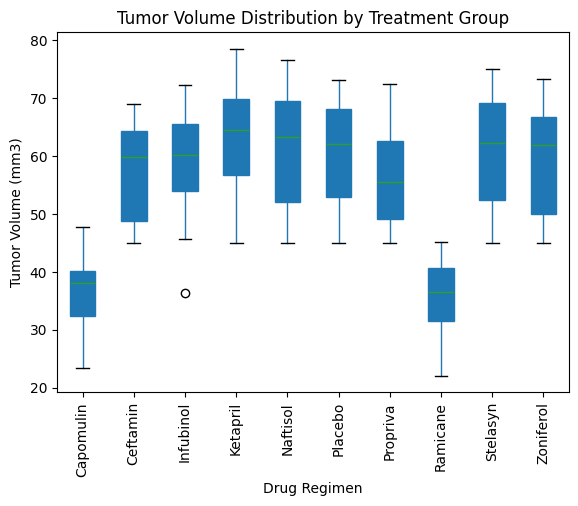

In [24]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
final_tumor_volume.boxplot(column="Tumor Volume (mm3)", by="Drug Regimen", grid=False, patch_artist=True)
plt.title("Tumor Volume Distribution by Treatment Group")
plt.suptitle("")  
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(rotation=90)
plt.show()

## Line and Scatter Plots

In [27]:
capomulinDF = clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"] == "Capomulin"]
capomulinDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


In [29]:
l509Data = capomulinDF.loc[capomulinDF["Mouse ID"] == "l509"]
l509Data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


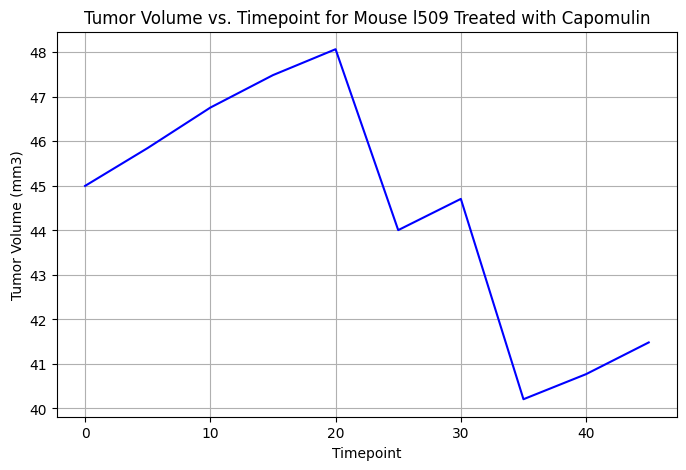

In [34]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Select a single mouse treated with Capomulin
capomulin_data = final_tumor_volume[final_tumor_volume["Drug Regimen"] == "Capomulin"]

# Select the data for a single mouse
single_mouse_id = l509Data["Mouse ID"].iloc[0] 
single_mouse_data = l509Data[l509Data["Mouse ID"] == single_mouse_id]

# Plot tumor volume vs. time point
plt.figure(figsize=(8, 5))
plt.plot(single_mouse_data["Timepoint"], single_mouse_data["Tumor Volume (mm3)"], linestyle="-", color="blue")

# Add labels and title
plt.title(f"Tumor Volume vs. Timepoint for Mouse l509 Treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(visible=True)
plt.show()


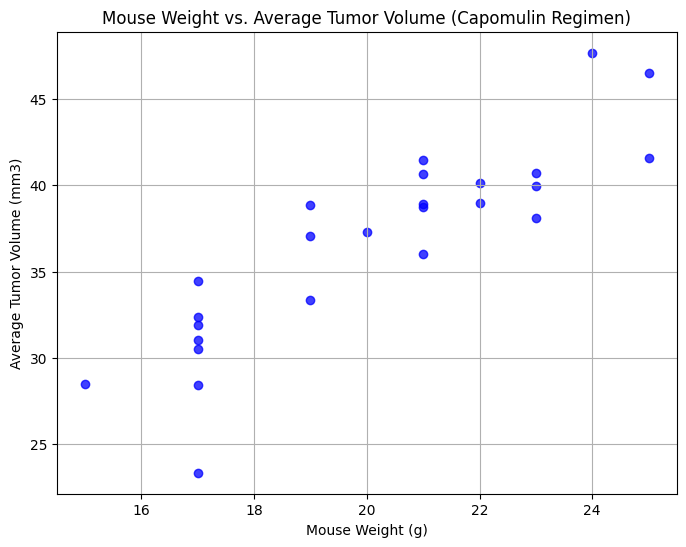

In [35]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter data for the Capomulin regimen
capomulin_data = final_tumor_volume[final_tumor_volume["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Retrieve the corresponding mouse weight
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].first()

# Create a DataFrame with mouse weight and average tumor volume
capomulin_summary = pd.DataFrame({
    "Mouse Weight (g)": mouse_weight,
    "Average Tumor Volume (mm3)": avg_tumor_volume
})

# Generate the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(
    capomulin_summary["Mouse Weight (g)"],
    capomulin_summary["Average Tumor Volume (mm3)"],
    color="blue",
    alpha=0.75
)

# Add labels, title, and grid
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(visible=True)
plt.show()


## Correlation and Regression

Correlation coefficient: 0.88


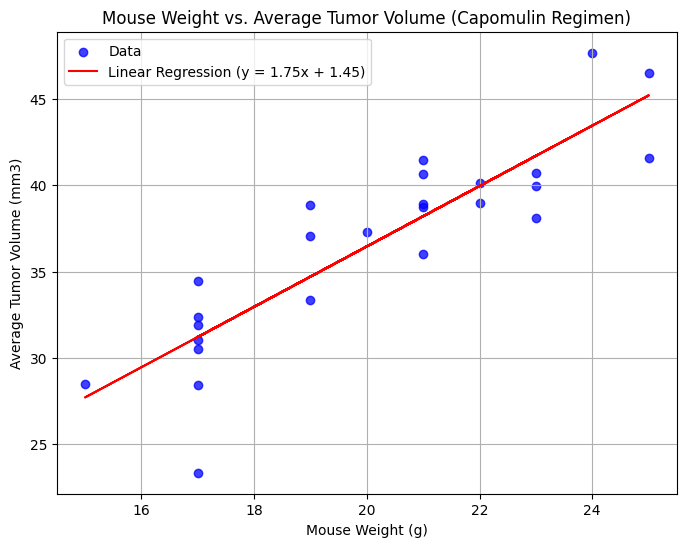

Slope: 1.75
Intercept: 1.45
R-squared: 0.77
P-value: 0.000
Standard Error: 0.200


In [36]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


# Filter data for the Capomulin regimen
capomulin_data = final_tumor_volume[final_tumor_volume["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Retrieve the corresponding mouse weight
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].first()

# Create a DataFrame with mouse weight and average tumor volume
capomulin_summary = pd.DataFrame({
    "Mouse Weight (g)": mouse_weight,
    "Average Tumor Volume (mm3)": avg_tumor_volume
})

# Calculate the correlation coefficient
correlation = np.corrcoef(capomulin_summary["Mouse Weight (g)"], capomulin_summary["Average Tumor Volume (mm3)"])[0, 1]
print(f"Correlation coefficient: {correlation:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(
    capomulin_summary["Mouse Weight (g)"], 
    capomulin_summary["Average Tumor Volume (mm3)"]
)

# Generate regression line
regression_line = slope * capomulin_summary["Mouse Weight (g)"] + intercept

# Plot the scatter plot with the regression line
plt.figure(figsize=(8, 6))
plt.scatter(
    capomulin_summary["Mouse Weight (g)"],
    capomulin_summary["Average Tumor Volume (mm3)"],
    color="blue",
    alpha=0.75,
    label="Data"
)
plt.plot(
    capomulin_summary["Mouse Weight (g)"], 
    regression_line, 
    color="red", 
    label=f"Linear Regression (y = {slope:.2f}x + {intercept:.2f})"
)

# Add labels, title, and legend
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()
plt.grid(visible=True)
plt.show()

# Print regression details
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.3f}")
print(f"Standard Error: {std_err:.3f}")
